# Customer Complaint Analysis

In [3]:
# Import the xlsx file

import pandas as pd

df = pd.read_excel('Financial Consumer Complaints.xlsx')
df.head()

,Complaint ID,Date Sumbited,Product,Issue,Company,State,Consumer consent provided?,Submitted via,Date Received,Response Time (Days),Company response to consumer,Timely response?,Consumer disputed?
0,2824926,2018-02-24,Credit card or prepaid card,Closing your account,Cumulus Financial,FL,Consent not provided,Web,2018-02-24,0,Closed with explanation,Yes,NaN
1,1515991,2015-08-12,Debt collection,Improper contact or sharing of info,Cumulus Financial,CA,Consent not provided,Web,2015-08-12,0,Closed with explanation,Yes,No
2,1145261,2014-12-05,Bank account or service,Deposits and withdrawals,Cumulus Financial,CA,NaN,Referral,2014-12-08,3,Closed with explanation,Yes,No
3,2573763,2017-07-13,Mortgage,Trouble during payment process,Cumulus Financial,CA,Consent not provided,Web,2017-07-13,0,Closed with explanation,Yes,NaN
4,2573113,2017-07-13,Mortgage,Struggling to pay mortgage,Cumulus Financial,NY,Consent not provided,Web,2017-07-13,0,Closed with explanation,Yes,NaN


## Data Cleaning

In [6]:
# Find and rectify incorrect data types
df.dtypes

Complaint ID                             int64
Date Sumbited                   datetime64[ns]
Product                         string[python]
Issue                           string[python]
Company                         string[python]
State                           string[python]
Consumer consent provided?                bool
Submitted via                   string[python]
Date Received                   datetime64[ns]
Response Time (Days)                     int64
Company response to consumer    string[python]
Timely response?                          bool
Consumer disputed?                        bool
dtype: object

In [5]:
# Rectify incorrect data types

df['Product'] = df['Product'].astype('string')
df['Issue'] = df['Issue'].astype('string')
df['Company'] = df['Company'].astype('string')
df['State'] = df['State'].astype('string')
df['Consumer consent provided?'] = df['Consumer consent provided?'].astype('bool')
df['Submitted via'] = df['Submitted via'].astype('string')
df['Company response to consumer'] = df['Company response to consumer'].astype('string')
df['Timely response?'] = df['Timely response?'].astype('bool')
df['Consumer disputed?'] = df['Consumer disputed?'].astype('bool')

In [9]:
# Find missing values
df.isnull().sum()

Complaint ID                    0
Date Sumbited                   0
Product                         0
Issue                           0
Company                         0
State                           0
Consumer consent provided?      0
Submitted via                   0
Date Received                   0
Response Time (Days)            0
Company response to consumer    0
Timely response?                0
Consumer disputed?              0
dtype: int64

In [8]:
# Rectify the missing values
df[df['Company'].isnull()]
df.loc[df['Company'].isnull(), 'Company'] = 'unknown'
df.loc[df['State'].isnull(), 'State'] = 'unknown'

In [73]:
# Find duplicate rows
df[df.duplicated()]

# Rectify duplicate rows

df.drop_duplicates(inplace = True)

In [74]:
# Find wrong spelling

df['Submitted via'].drop_duplicates()

0               Web
2          Referral
11            Phone
17      Postal mail
27              Fax
2646          Email
Name: Submitted via, dtype: string

In [19]:
# Rectify wrong spelling

df.loc[df['Submitted via'] == 'Webbb', 'Submitted via'] = 'Web'
df.loc[df['Submitted via'] == 'Faxe', 'Submitted via'] = 'Fax'

# Business Questions:

In [21]:
# 1. What are the top 5 products customers have a complaint about?

df['Product'].value_counts().head(5)

Product
Credit card                    19176
Checking or savings account    13436
Mortgage                       12470
Credit card or prepaid card    10241
Bank account or service         9893
Name: count, dtype: Int64

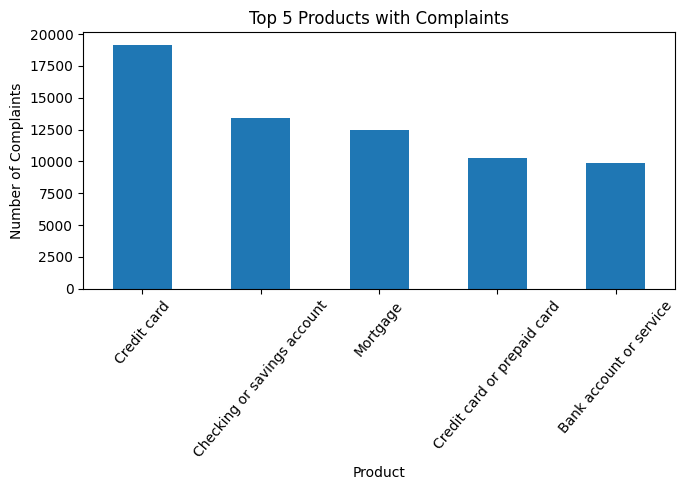

In [56]:
# Visualization of the top 5 products customers have a complaint about

import matplotlib.pyplot as plt
top_5_products = df['Product'].value_counts().head(5)

# Plot a bar chart
plt.figure(figsize=(7,5))
top_5_products.plot(kind='bar')
plt.title('Top 5 Products with Complaints')
plt.xlabel('Product')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=50)
plt.tight_layout()
plt.show()

In [22]:
# 2. What are the top 5 issues that are commonly reported?

df['Issue'].value_counts().head(5)

Issue
Managing an account                                8849
Deposits and withdrawals                           6127
Trouble during payment process                     3534
Struggling to pay mortgage                         3437
Problem with a purchase shown on your statement    3365
Name: count, dtype: Int64

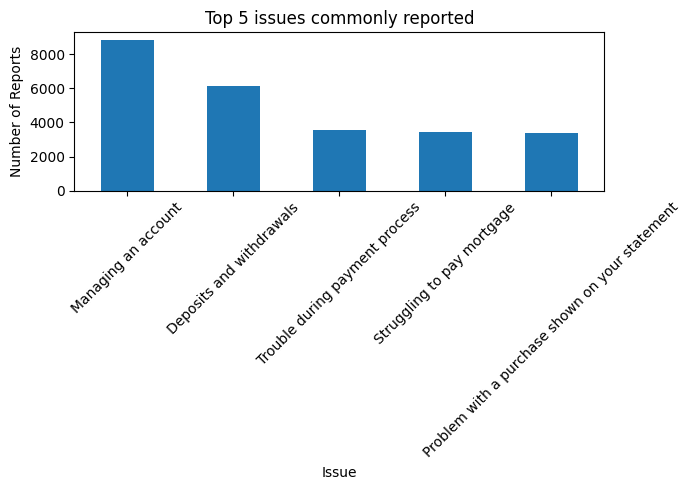

In [66]:
# Visualization of the top 5 issues that are commonly reported.
top_5_issues = df['Issue'].value_counts().head(5)

# Plot a bar chart
plt.figure(figsize=(7,5))
top_5_issues.plot(kind='bar')
plt.title('Top 5 issues commonly reported')
plt.xlabel('Issue')
plt.ylabel('Number of Reports')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [72]:
# 3. Which submission channels are most commonly used for complaints?

df['Submitted via'].drop_duplicates()

0               Web
2          Referral
11            Phone
17      Postal mail
27              Fax
2646          Email
Name: Submitted via, dtype: string

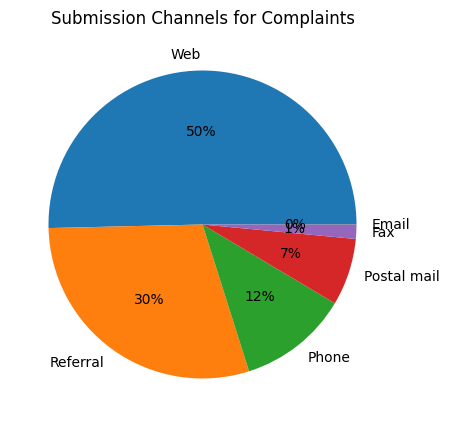

In [86]:
# Visualization of the submission channels commonly used for complaints.
# # Plot a pie chart
submission_channels = df['Submitted via'].value_counts()

plt.figure(figsize=(10,5))
plt.pie(submission_channels, labels=submission_channels.index, autopct='%1.0f%%')
plt.title('Submission Channels for Complaints')
plt.show()

In [29]:
# 4. Which submission channels have the highest non timely response?

# Find the average response time for each submission channel and sort the result.
df.groupby('Submitted via')['Response Time (Days)'].mean().sort_values(ascending=False).round(2)

Submitted via
Email          5.95
Referral       4.81
Postal mail    2.80
Phone          2.66
Fax            2.63
Web            1.32
Name: Response Time (Days), dtype: float64

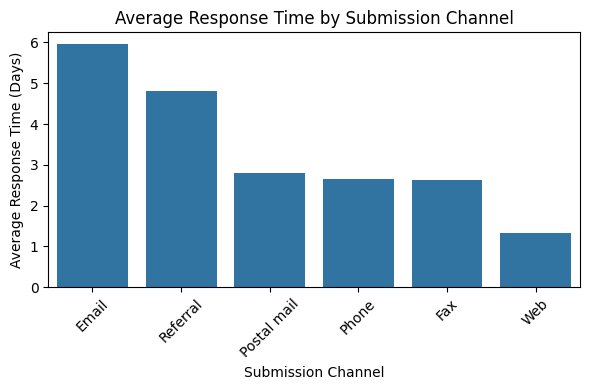

In [82]:
# Visualization of the submission channels with the highest average response time
# Plot a Seaborn Bar Chart
import seaborn as sns
avg_response_time = df.groupby('Submitted via')['Response Time (Days)'].mean().sort_values(ascending=False).round(2)

plt.figure(figsize=(6,4))
sns.barplot(x=avg_response_time.index, y=avg_response_time.values)
plt.title('Average Response Time by Submission Channel')
plt.xlabel('Submission Channel')
plt.ylabel('Average Response Time (Days)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [32]:
# 5. What are the top 3 issues the consumers disputed the most?

df['Issue'].value_counts().head(3)

Issue
Managing an account               8849
Deposits and withdrawals          6127
Trouble during payment process    3534
Name: count, dtype: Int64

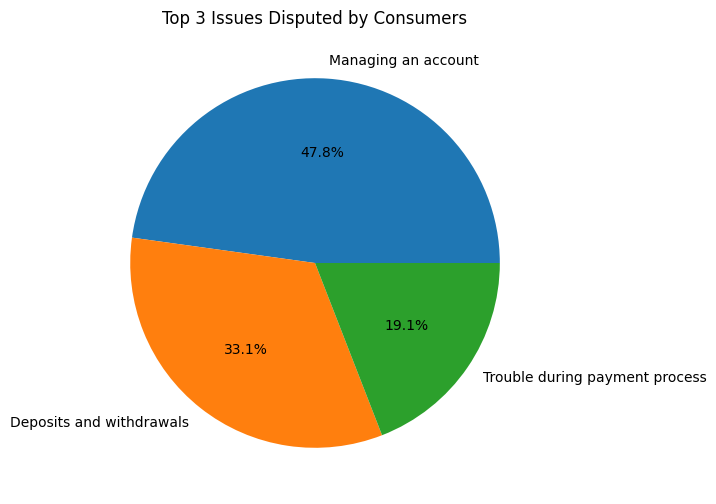

In [83]:
# Visualization of the Top 3 Issues Disputed by Consumers
# Plot a Pie Chart:

top_3_issues = df['Issue'].value_counts().head(3)

plt.figure(figsize=(10,6))
plt.pie(top_3_issues, labels=top_3_issues.index, autopct='%1.1f%%')
plt.title('Top 3 Issues Disputed by Consumers')
plt.show()

In [34]:
# 6. Which state did most of the complaints come from?

df['State'].value_counts().head(1)

State
CA    12107
Name: count, dtype: Int64

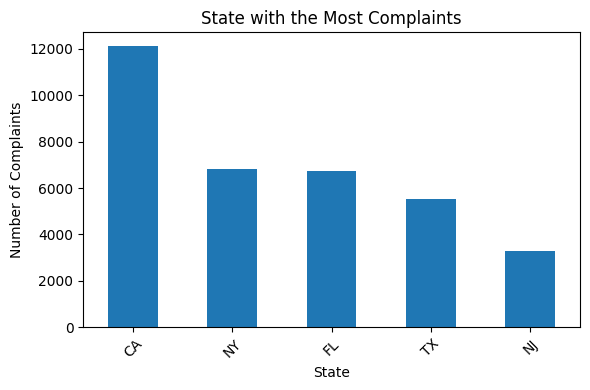

In [91]:
# Visualization of the state with the highest complaints 

top_state = df['State'].value_counts().head(5)

plt.figure(figsize=(6,4))
top_state.plot(kind='bar')
plt.title('State with the Most Complaints')
plt.xlabel('State')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()